<a href="https://colab.research.google.com/github/MichaelTj02/FinalProject_Group1/blob/main/LicensePlate_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data and imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

Convert XML label files to .txt

In [ ]:
import os
import xml.etree.ElementTree as ET

def convert_xml_to_yolo(xml_dir, output_dir, class_list, img_dir):

    os.makedirs(output_dir, exist_ok=True)
    for xml_file in os.listdir(xml_dir):
        if xml_file.endswith(".xml"):
            xml_path = os.path.join(xml_dir, xml_file)
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Get image dimensions
            size = root.find("size")
            img_width = int(size.find("width").text)
            img_height = int(size.find("height").text)

            # Prepare YOLO annotation content
            yolo_annotations = []

            # Parse objects
            for obj in root.findall("object"):
                class_name = obj.find("name").text
                if class_name not in class_list:
                    print(f"Warning: Class '{class_name}' not in class list. Skipping.")
                    continue

                class_id = class_list.index(class_name)
                bndbox = obj.find("bndbox")
                xmin = int(bndbox.find("xmin").text)
                ymin = int(bndbox.find("ymin").text)
                xmax = int(bndbox.find("xmax").text)
                ymax = int(bndbox.find("ymax").text)

                # Convert to YOLO format (normalized values)
                x_center = (xmin + xmax) / 2 / img_width
                y_center = (ymin + ymax) / 2 / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                yolo_annotations.append(f"{class_id} {x_center} {y_center} {width} {height}")

            # Save annotations to .txt file (one file per image)
            image_name = os.path.splitext(xml_file)[0]
            output_file = os.path.join(output_dir, image_name + ".txt")
            with open(output_file, "w") as f:
                f.write("\n".join(yolo_annotations))
            print(f"Converted: {xml_file} -> {output_file}")

# Define paths
base_dir = r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset"
train_xml_dir = os.path.join(base_dir, "labels/train")
val_xml_dir = os.path.join(base_dir, "labels/val")
train_output_dir = os.path.join(base_dir, "train")
val_output_dir = os.path.join(base_dir, "val")
train_img_dir = os.path.join(base_dir, "images/train")
val_img_dir = os.path.join(base_dir, "images/val")

# Class list (e.g., numbers and uppercase letters)
class_list = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")

# Convert XML to YOLO for train and val datasets
convert_xml_to_yolo(train_xml_dir, train_output_dir, class_list, train_img_dir)
convert_xml_to_yolo(val_xml_dir, val_output_dir, class_list, val_img_dir)


Converted: 0000.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0000.txt
Converted: 0001.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0001.txt
Converted: 0003.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0003.txt
Converted: 0004.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0004.txt
Converted: 0005.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0005.txt
Converted: 0006.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0006.txt
Converted: 0008.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0008.txt
Converted: 0009.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0009.txt
Converted: 0010.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0010.txt
Converted:

# License plate character recognition using YOLO

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Setup complete  (32 CPUs, 31.7 GB RAM, 372.2/930.7 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO('yolov8s.pt') # pretrained model

**Test default model**

In [5]:
%%writefile config.yaml
path: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset
train: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\train
val: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\val

# Classes
nc: 36  # Number of classes (26 letters + 10 digits)

# Class names
names:
  0: A
  1: B
  2: C
  3: D
  4: E
  5: F
  6: G
  7: H
  8: I
  9: J
  10: K
  11: L
  12: M
  13: N
  14: O
  15: P
  16: Q
  17: R
  18: S
  19: T
  20: U
  21: V
  22: W
  23: X
  24: Y
  25: Z
  26: 0
  27: 1
  28: 2
  29: 3
  30: 4
  31: 5
  32: 6
  33: 7
  34: 8
  35: 9

Overwriting config.yaml


In [6]:
model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640, name="default_training_run")

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=default_training_run3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\default_training_run3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\default_training_run3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.28G      1.422      4.808      1.241        167        640: 100%|██████████| 21/21 [00:01<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0219      0.308     0.0316     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.12G      1.119      3.419      1.058        181        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.451      0.185     0.0979     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.14G      1.005      2.686      1.022         87        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.376      0.305      0.195      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.07G      1.002      2.414      1.046        127        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.743      0.291      0.301      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.17G      1.005      2.248      1.015        166        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.687      0.327      0.346      0.268



5 epochs completed in 0.003 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\default_training_run3\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\default_training_run3\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\default_training_run3\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.686      0.328      0.347      0.268
                     A         11         13      0.609      0.538      0.435        0.3
                     B         10         10      0.514        0.3      0.372      0.287
                     C         12         12      0.204        0.5      0.392       0.33
                     D          5          5          1          0     0.0214     0.0161
                     E          7          8          0          0      0.175      0.145
                     F          2          2          1          0     0.0115    0.00896
                     H         27         29      0.469      0.759      0.625      0.465
                     J          1          1          1          0          0          0
                     K          6          6      0.409      0.833      0.778      0.546
                     L          6          6      0.338      0.833      0.712      0.596
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002719A4CAFC0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038, 

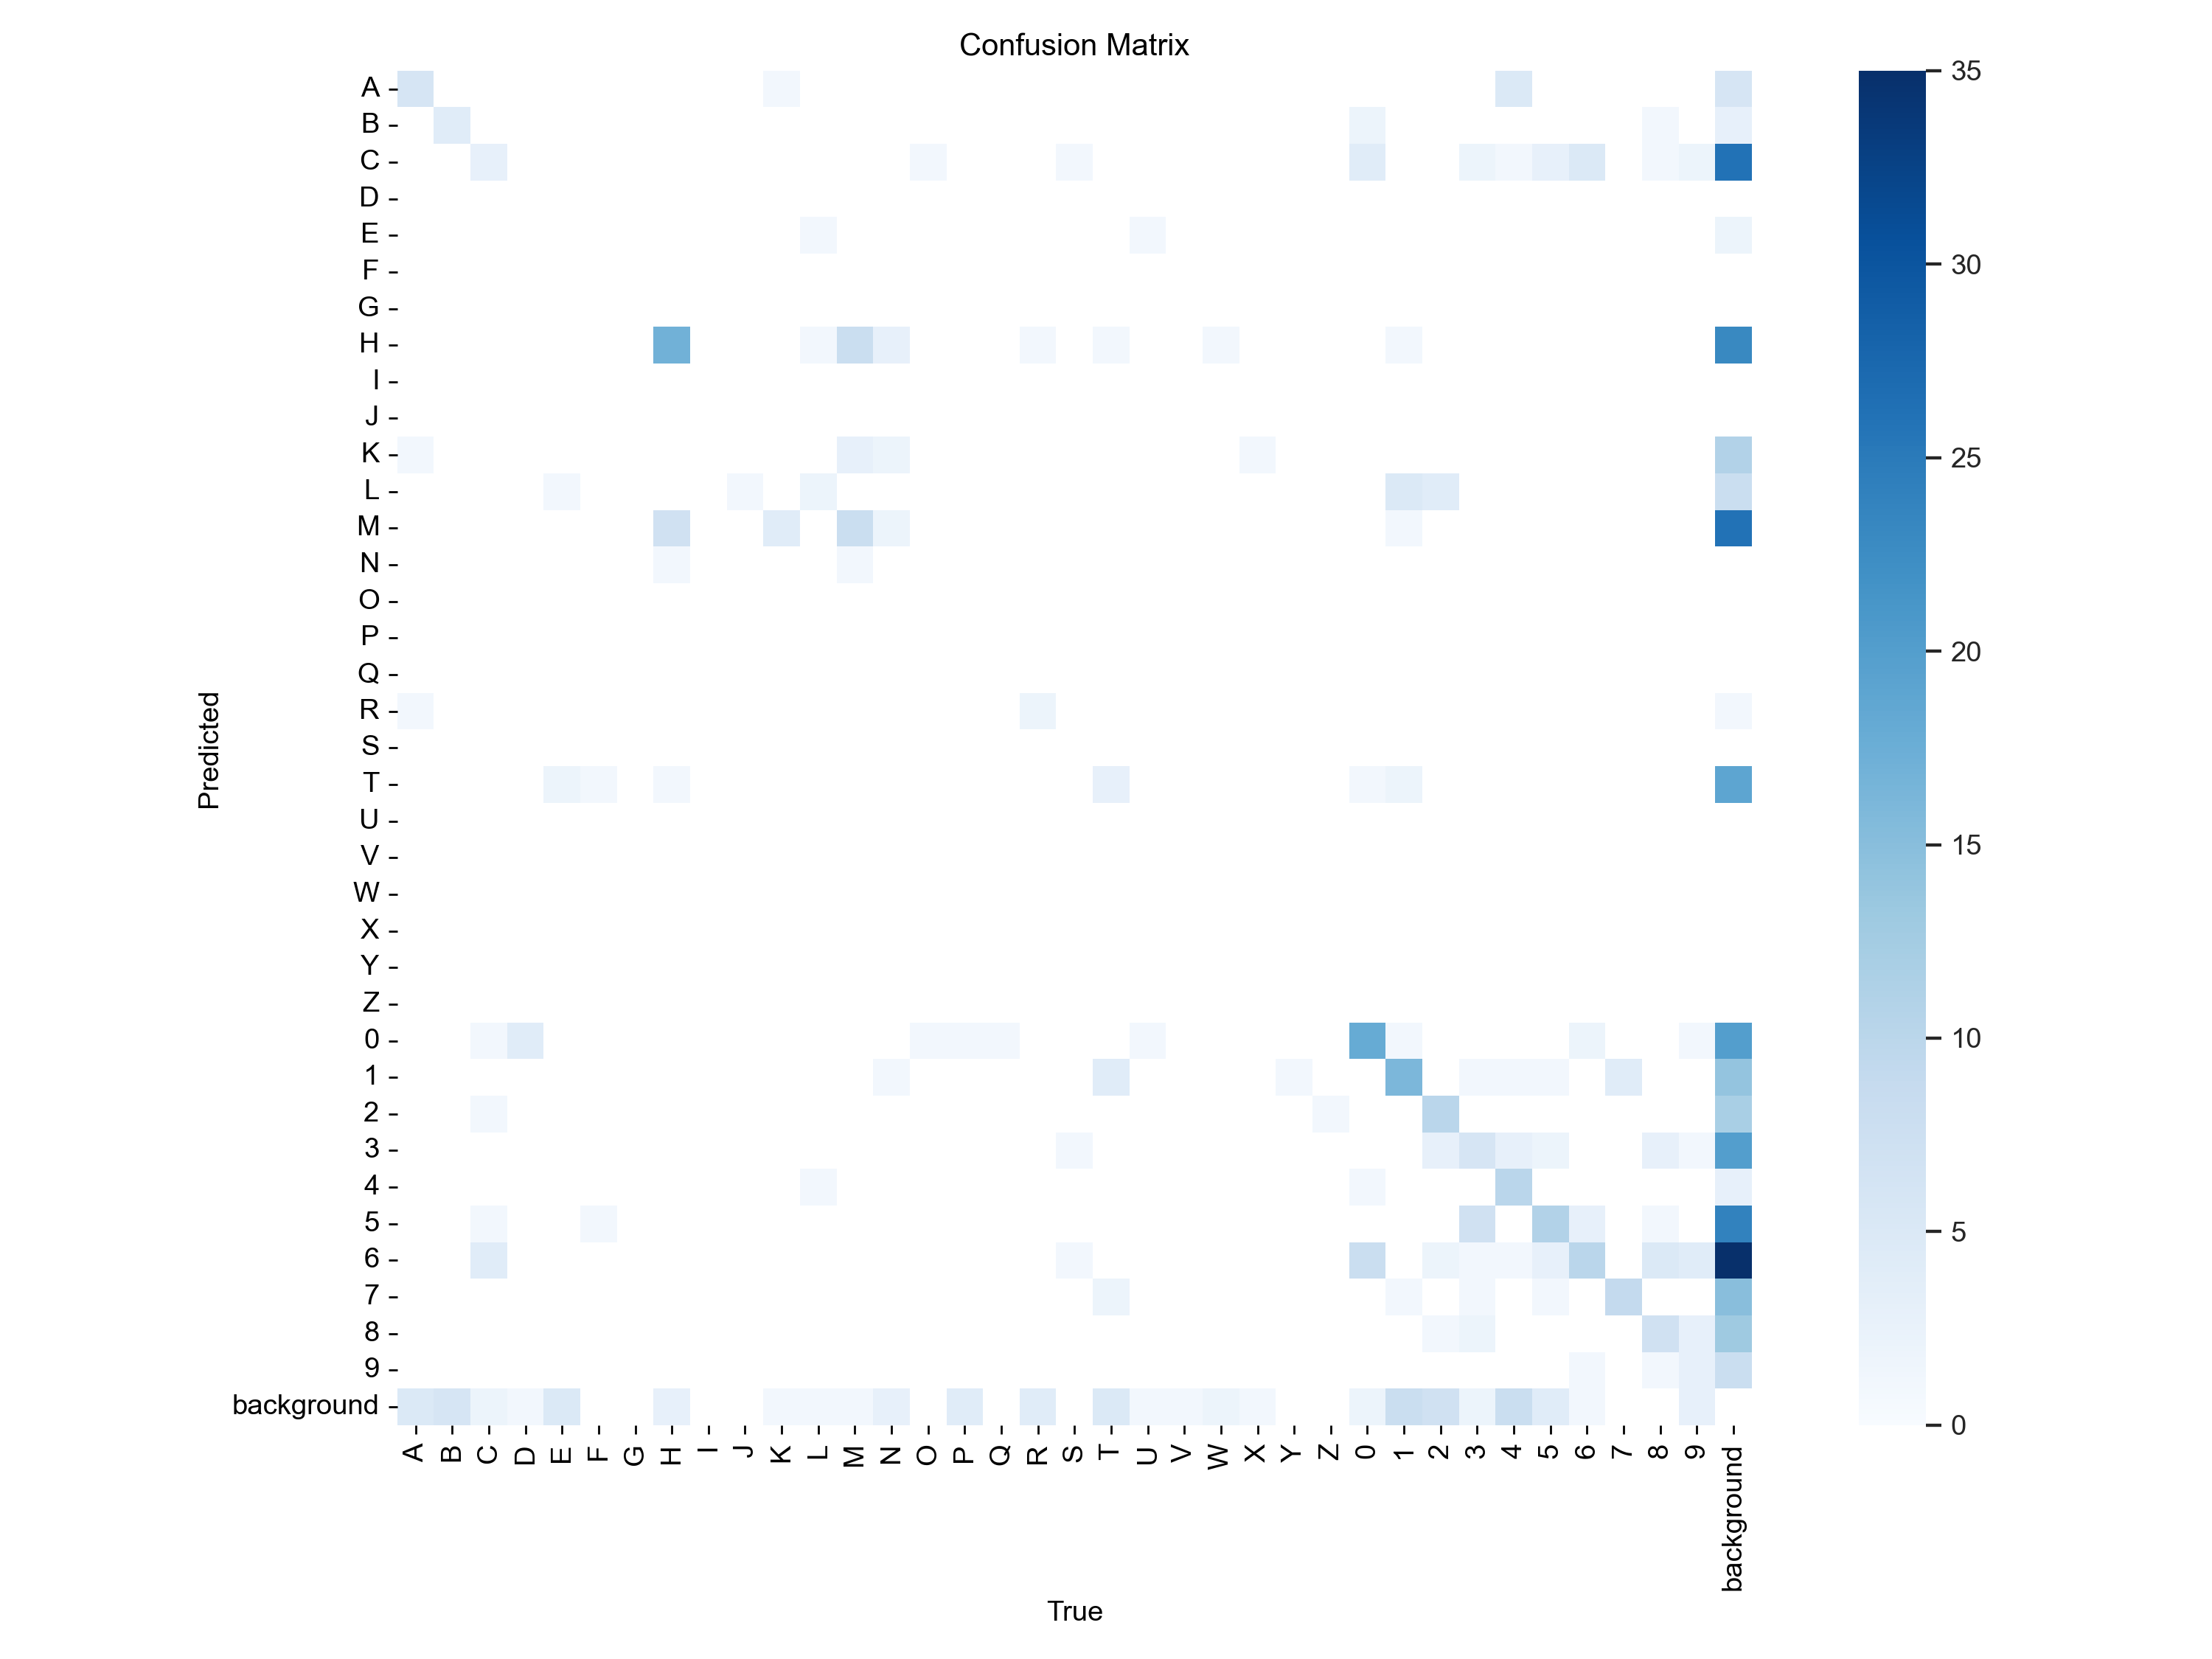

In [7]:
%matplotlib inline
from PIL import Image

Image.open('C:/Users/mtj02/runs/detect/default_training_run2/confusion_matrix.png')

**Predictions**

In [8]:
model = YOLO('C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt')  # load a custom model

In [9]:
# Perform predictions on the image
results = model.predict(
    source='C:/Users/mtj02/Desktop/FinalProject_Group1/Datasets/LicensePlateDataset/images/train/0000.png',
    save=True,
    show_labels=True
)

# Extract predictions
predicted_text = []
for box in results[0].boxes.data:
    xmin = box[0].item()  # x-coordinate of the top-left corner of the bounding box
    class_id = int(box[-1])  # Class ID of the detected character
    predicted_text.append((xmin, model.names[class_id]))  # Append x-coordinate and character

# Sort the characters by their x-coordinate (left to right)
sorted_text = sorted(predicted_text, key=lambda x: x[0])

# Combine sorted characters into a single string
predicted_string = ''.join([char for _, char in sorted_text])

# Print the sorted predicted text
print("Predicted Text:", predicted_string)



image 1/1 C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\train\0000.png: 256x640 1 H, 1 M, 1 T, 1 2, 2 5s, 1 6, 1 7, 39.8ms
Speed: 0.0ms preprocess, 39.8ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 640)
Results saved to C:\Users\mtj02\runs\detect\predict3
Predicted Text: MH7T2556


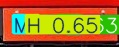

In [10]:
# Prediction 1
%matplotlib inline
from PIL import Image

Image.open("C:/Users/mtj02/runs/detect/predict2/0000.jpg")

In [11]:
# Perform predictions on the image
results = model.predict(
    source='C:/Users/mtj02/Desktop/FinalProject_Group1/Datasets/LicensePlateDataset/images/val/0203.png',
    save=True,
    show_labels=True
)

# Extract predictions
predicted_text = []
for box in results[0].boxes.data:
    xmin = box[0].item()  # x-coordinate of the top-left corner of the bounding box
    class_id = int(box[-1])  # Class ID of the detected character
    predicted_text.append((xmin, model.names[class_id]))  # Append x-coordinate and character

# Sort the characters by their x-coordinate (left to right)
sorted_text = sorted(predicted_text, key=lambda x: x[0])

# Combine sorted characters into a single string
predicted_string = ''.join([char for _, char in sorted_text])

# Print the sorted predicted text
print("Predicted Text:", predicted_string)


image 1/1 C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\val\0203.png: 384x640 2 Hs, 2 Ms, 3 0s, 1 2, 1 3, 1 6, 48.1ms
Speed: 0.0ms preprocess, 48.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\mtj02\runs\detect\predict3
Predicted Text: HMMH320006


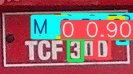

In [13]:
# Prediction 2
%matplotlib inline
from PIL import Image

Image.open("C:/Users/mtj02/runs/detect/predict3/0203.jpg")

**Finding best parameters for the model**

Try different **learning rates**

In [14]:
# Learning rates
for lr in [0.01, 0.001, 0.0005, 0.0001]:
    model.train(data="config.yaml", epochs=5, patience=5, batch=8, lr0=lr, imgsz=640, name=f"lr_{lr}")

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=lr_0.01, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.01\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.01
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.35G      1.822      4.625      1.553        167        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0412      0.223     0.0669     0.0439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.19G      1.438      4.402      1.374        181        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0447      0.288       0.11     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.22G      1.311      4.191      1.311         87        640: 100%|██████████| 21/21 [00:00<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0435      0.371      0.122     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.16G      1.276      4.049      1.292        127        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413     0.0432      0.442      0.148      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.21G      1.274      4.009      1.242        166        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0432      0.455      0.155      0.116



5 epochs completed in 0.014 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.01\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.01\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.01\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413     0.0433      0.455      0.155      0.116
                     A         11         13          0          0          0          0
                     B         10         10     0.0789        0.9      0.178      0.147
                     C         12         12     0.0345      0.333     0.0508      0.037
                     D          5          5     0.0175        0.8     0.0484     0.0283
                     E          7          8          0          0          0          0
                     F          2          2          0          0          0          0
                     H         27         29     0.0986      0.966      0.632      0.458
                     J          1          1          0          0          0          0
                     K          6          6     0.0179          1      0.214      0.155
                     L          6          6       0.05      0.167     0.0359     0.0287
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.001\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.001
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.56G      1.232      3.932      1.256        167        640: 100%|██████████| 21/21 [00:01<00:00, 20.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0557      0.479       0.18      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5       2.2G       1.15      3.715      1.183        181        640: 100%|██████████| 21/21 [00:00<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0474      0.513      0.199      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.15G      1.142      3.528      1.175         87        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413     0.0439      0.564      0.219      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.18G      1.167       3.43      1.188        127        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413       0.71      0.175      0.235       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.15G      1.183      3.409      1.154        166        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.752      0.124      0.247      0.189



5 epochs completed in 0.014 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.001\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.001\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.001\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.753      0.125      0.247      0.189
                     A         11         13          1          0      0.555      0.396
                     B         10         10          1          0      0.291      0.231
                     C         12         12          1          0      0.104     0.0776
                     D          5          5          1          0     0.0801     0.0639
                     E          7          8          1          0          0          0
                     F          2          2          1          0     0.0143     0.0115
                     H         27         29      0.543      0.778       0.68      0.521
                     J          1          1          1          0          0          0
                     K          6          6      0.506      0.172       0.41      0.297
                     L          6          6          1          0       0.24      0.181
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.0005\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.0005
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.56G      1.129      3.325      1.165        167        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.799      0.143      0.259      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.33G      1.074      3.115      1.114        181        640: 100%|██████████| 21/21 [00:01<00:00, 18.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.711      0.194      0.284      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.27G      1.078       2.95      1.122         87        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.708      0.228      0.308      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.21G      1.122      2.928      1.145        127        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.694      0.256      0.325      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.28G      1.142      2.919      1.117        166        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.682      0.269      0.332      0.257



5 epochs completed in 0.037 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0005\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0005\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.0005\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.682      0.269      0.333      0.257
                     A         11         13          1     0.0956      0.602      0.443
                     B         10         10          1      0.185      0.752      0.621
                     C         12         12          0          0      0.108     0.0808
                     D          5          5          1          0     0.0578      0.046
                     E          7          8          1          0     0.0317     0.0242
                     F          2          2          1          0     0.0158     0.0133
                     H         27         29        0.3      0.931       0.75       0.57
                     J          1          1          1          0    0.00822    0.00576
                     K          6          6      0.128      0.833      0.758      0.581
                     L          6          6          1          0      0.299       0.24
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.0001\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.0001
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.52G      1.065      2.811      1.117        167        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.694       0.27      0.342      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.26G      1.023       2.62      1.076        181        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.637      0.299      0.363      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.28G       1.04      2.506      1.092         87        640: 100%|██████████| 21/21 [00:00<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.675      0.336      0.374       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.21G      1.082      2.512      1.115        127        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413        0.7       0.35      0.393      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.26G      1.104      2.535      1.093        166        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.701      0.355      0.397      0.306



5 epochs completed in 0.036 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0001\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0001\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.0001\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.704      0.354      0.397      0.306
                     A         11         13      0.743      0.231      0.616      0.432
                     B         10         10          1      0.449      0.807       0.65
                     C         12         12      0.142      0.235      0.134      0.104
                     D          5          5          1          0      0.134      0.119
                     E          7          8          1          0     0.0825     0.0659
                     F          2          2          1          0      0.018     0.0162
                     H         27         29      0.361      0.931      0.798      0.622
                     J          1          1          1          0     0.0107    0.00749
                     K          6          6      0.168      0.833      0.843      0.634
                     L          6          6      0.586      0.333       0.39      0.319
                     

We found that **lr = 0.0001** performs best. Now try different **batch sizes**.

In [16]:
# Try different batch sizes
for batch_size in [4, 8, 16, 32]:
    model.train(data="config.yaml", epochs=5, patience=5, batch=batch_size, lr0=0.0001, imgsz=640, name=f"batch_{batch_size}")

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=batch_4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.35G       1.09       2.56      1.111         72        640: 100%|██████████| 42/42 [00:01<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0

                   all         42        413      0.763      0.329      0.399      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.27G      1.094      2.385      1.117         48        640: 100%|██████████| 42/42 [00:01<00:00, 30.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0

                   all         42        413      0.702      0.366      0.414      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.26G      1.075      2.352       1.09         75        640: 100%|██████████| 42/42 [00:01<00:00, 30.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.705      0.396      0.433      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.27G      1.075        2.3      1.112         63        640: 100%|██████████| 42/42 [00:01<00:00, 31.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.745      0.373      0.452      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.28G      1.064      2.272      1.095         38        640: 100%|██████████| 42/42 [00:01<00:00, 31.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.759      0.374      0.457      0.353

5 epochs completed in 0.037 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_4\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_4\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_4\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.759      0.374      0.456      0.353
                     A         11         13      0.685       0.67       0.66      0.465
                     B         10         10          1      0.335      0.738      0.591
                     C         12         12      0.228      0.223      0.212      0.164
                     D          5          5          1          0      0.186       0.15
                     E          7          8          1          0      0.214      0.172
                     F          2          2          1          0     0.0249     0.0224
                     H         27         29      0.454      0.918      0.826      0.649
                     J          1          1          1          0     0.0079    0.00553
                     K          6          6      0.332      0.833      0.843      0.651
                     L          6          6       0.93        0.5      0.701       0.57
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.56G     0.9841      2.135      1.072        167        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.759      0.385      0.468      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.35G     0.9566      1.997       1.04        181        640: 100%|██████████| 21/21 [00:01<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.782      0.361      0.478       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.29G     0.9671      1.944      1.053         87        640: 100%|██████████| 21/21 [00:01<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.753      0.404      0.492      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.21G      1.013      2.014       1.08        127        640: 100%|██████████| 21/21 [00:00<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.747      0.417      0.501      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.29G      1.037      2.045      1.063        166        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.752      0.429      0.504      0.388

5 epochs completed in 0.036 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_8\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_8\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_8\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413       0.75      0.428      0.504      0.388
                     A         11         13      0.589      0.846      0.722       0.49
                     B         10         10      0.967        0.6      0.799      0.649
                     C         12         12      0.227       0.25      0.262      0.203
                     D          5          5          1          0      0.391      0.353
                     E          7          8          1          0      0.323      0.265
                     F          2          2          1          0     0.0553     0.0497
                     H         27         29      0.478      0.966      0.877       0.69
                     J          1          1          1          0     0.0191     0.0153
                     K          6          6      0.258      0.833       0.85      0.647
                     L          6          6      0.797      0.655      0.755      0.613
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_16
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.33G     0.9677      1.929      1.053        125        640: 100%|██████████| 11/11 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.746      0.438      0.495      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         4G     0.9908      1.948      1.048        107        640: 100%|██████████| 11/11 [00:00<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.774      0.431      0.506      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.99G     0.9432      1.903      1.029        129        640: 100%|██████████| 11/11 [00:00<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.773      0.446      0.515      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.98G     0.9735      1.867      1.068        128        640: 100%|██████████| 11/11 [00:00<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.782      0.451      0.521      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.98G     0.9946      1.906      1.061        136        640: 100%|██████████| 11/11 [00:00<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.788      0.433      0.527       0.41



5 epochs completed in 0.036 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_16\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_16\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_16\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         42        413      0.788      0.434      0.526       0.41
                     A         11         13      0.588      0.846      0.769      0.543
                     B         10         10          1      0.457      0.846      0.688
                     C         12         12       0.34      0.345      0.332      0.256
                     D          5          5          1          0      0.329      0.288
                     E          7          8      0.883       0.25      0.388      0.309
                     F          2          2          1          0     0.0905     0.0814
                     H         27         29      0.535      0.952      0.909      0.715
                     J          1          1          1          0     0.0163      0.013
                     K          6          6      0.533      0.833      0.855      0.634
                     L          6          6      0.845      0.667       0.84      0.686
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_32\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_32
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       7.7G     0.9433      1.741      1.026        133        640: 100%|██████████| 6/6 [00:02<00:00,  2.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         42        413      0.789      0.433      0.524      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      7.51G     0.9668      1.801      1.047        134        640: 100%|██████████| 6/6 [00:01<00:00,  5.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         42        413      0.795      0.431      0.529      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      7.73G     0.9501      1.815      1.034        185        640: 100%|██████████| 6/6 [00:00<00:00,  7.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         42        413      0.794      0.434      0.535      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      7.42G     0.9697      1.799      1.055        152        640: 100%|██████████| 6/6 [00:00<00:00,  7.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         42        413      0.803      0.424      0.538      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      7.49G     0.9691      1.793      1.047        132        640: 100%|██████████| 6/6 [00:00<00:00,  7.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         42        413      0.802      0.428      0.538      0.418

5 epochs completed in 0.037 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_32\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_32\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_32\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         42        413      0.798       0.43      0.539      0.419
                     A         11         13        0.6      0.846      0.792      0.544
                     B         10         10          1      0.505      0.829      0.681
                     C         12         12      0.264     0.0833      0.394      0.324
                     D          5          5          1          0       0.39      0.343
                     E          7          8      0.808       0.25      0.423      0.332
                     F          2          2          1          0     0.0711      0.064
                     H         27         29      0.587      0.931      0.915      0.712
                     J          1          1          1          0     0.0262     0.0209
                     K          6          6       0.56      0.833      0.861      0.639
                     L          6          6      0.793      0.833      0.834      0.682
                     

We found that **batch size = 32** performs best. Now try different **epochs**.

In [ ]:
for epoch in [10, 30, 50, 100]:
  model.train(data="config.yaml",epochs=epoch,patience=5,batch=8, lr0=0.0001,imgsz=640, name=f"epoch_{epoch}")